# Лекция 4. Оценка взаимосвязи показателей

## Корреляционное отношение

При анализе данных очень часто приходится оценивать насколько значение одного показателя зависит от значения другого.

В статистике для этих целей разработано много различных подходов. Прежде, чем мы начнем их рассматривать, важно указать, что в статистическом анализе изучаются не все виды зависимостей.

Например, **функциональные зависимости** между переменными изучают в математическом анализе, в классической физике. Если переменная $y$ функционально зависит от переменной $x$, то это означает, что если сейчас при $x=1$ $y=6$, то это будет и завтра, и вообще всегда. 
Статистическая взаимосвязь между переменными напротив не проявляется в каждом отдельном случае, иногда могут быть существенные отклонения, иногда не очень существенные. Про такую взаимосвязь можно говорить, что на большом числе данных в среднем будет наблюдаться  взаимосвязь. Например, известно, что в среднем при увеличении объема производства товара его себестоимость снижается. 

Как мы уже выяснили, при группировке данных по переменной $x$ внутри каждой группы вариабельность признака $x$ уменьшается. Рассмотрим этот вопрос подробнее. Возьмем для этих целей один из датасетов библиотеки pydataset - Computers, в котором отражены статистические зависимости между ценой компьютера, его скоростью, объемом оперативной памяти, объемом винчестера и т.д. Выполним предварительный визуальный анализ зависимости между ценой и объемом оперативной памяти:

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
1,1499,25,80,4,14,no,no,yes,94,1
2,1795,33,85,2,14,no,no,yes,94,1
3,1595,25,170,4,15,no,no,yes,94,1
4,1849,25,170,8,14,no,no,no,94,1
5,3295,33,340,16,14,no,no,yes,94,1
...,...,...,...,...,...,...,...,...,...,...
6255,1690,100,528,8,15,no,no,yes,39,35
6256,2223,66,850,16,15,yes,yes,yes,39,35
6257,2654,100,1200,24,15,yes,no,yes,39,35
6258,2195,100,850,16,15,yes,no,yes,39,35


<AxesSubplot:xlabel='price', ylabel='ram'>

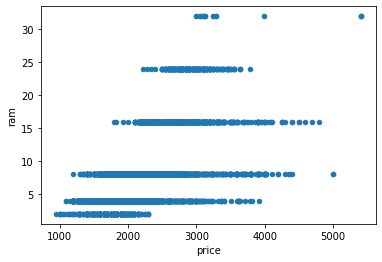

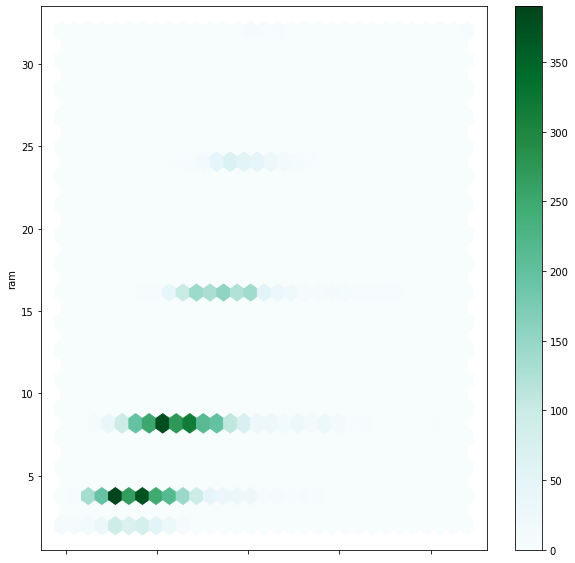

In [1]:
import pydataset as ds

G=ds.data('Computers')
display(G)
G.plot.scatter(x='price', y='ram')
G.plot.hexbin(x='price', y='ram', gridsize=30, figsize=(10,10))

Кстати, весь состав библиотеки pydataset можно получить, выполнив перевод ds.data().iloc[i].title здесь же в python с помощью google translate. Для этогj нужно установить библиотеку googletrans:

> pip3 install googletrans

Далее порядок действий следующий (показан перевод первых 20 датасетов):

In [2]:
from googletrans import Translator
import pandas as pd
translator = Translator()

for i in range(21):
    print('Номер:'+str(i)+'; dataset_id: '+ds.data().iloc[i].dataset_id+'; Название: '+translator.translate(ds.data().iloc[i].title,src='en', dest='ru').text)

Номер:0; dataset_id: AirPassengers; Название: Ежемесячные номера пассажиров авиакомпании 1949-1960
Номер:1; dataset_id: BJsales; Название: Данные по продажам с лидирующим индикатором
Номер:2; dataset_id: BOD; Название: Биохимический спрос на кислород
Номер:3; dataset_id: Formaldehyde; Название: Определение формальдегида
Номер:4; dataset_id: HairEyeColor; Название: Волосы и глазные статистики Студенты
Номер:5; dataset_id: InsectSprays; Название: Эффективность распылителей насекомых
Номер:6; dataset_id: JohnsonJohnson; Название: Ежеквартальная прибыль на Джонсон и Джонсон Доля
Номер:7; dataset_id: LakeHuron; Название: Уровень озера Гурон 1875-1972
Номер:8; dataset_id: LifeCycleSavings; Название: Межстрановые сберегательные данные жизненного цикла
Номер:9; dataset_id: Nile; Название: Поток реки Нил
Номер:10; dataset_id: OrchardSprays; Название: Потенция спрей сада
Номер:11; dataset_id: PlantGrowth; Название: Результаты эксперимента по росту растений
Номер:12; dataset_id: Puromycin; Назван

In [3]:
u=translator.translate("Привет мир",src='ru', dest='en').text
u

'Hello World'

Рассмотрим гистограмму и ящик с усами цены:

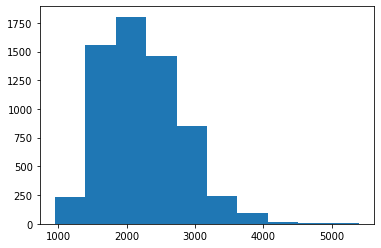

<AxesSubplot:>

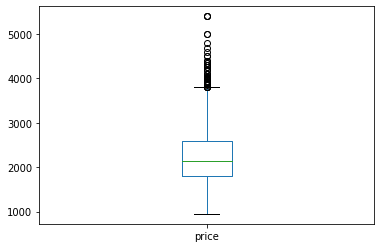

In [4]:
from matplotlib import pyplot as plt
gg=(plt.hist(G['price']))
group=[list(gg[0]),list(gg[1])]
plt.show()
G['price'].plot.box()


In [5]:
group

[[237.0, 1554.0, 1803.0, 1459.0, 850.0, 238.0, 92.0, 18.0, 3.0, 5.0],
 [949.0,
  1394.0,
  1839.0,
  2284.0,
  2729.0,
  3174.0,
  3619.0,
  4064.0,
  4509.0,
  4954.0,
  5399.0]]

Ящик с усами показывает на существенные отклонения от центральной тенденции в правом хвосте. Соответственно по коэффициенту вариации статистическая совокупность близка к неоднородной:

In [6]:
kv=100*G['price'].std()/G['price'].mean()
kv

26.167330882798556

При группировке всего у нас получилось 10 групп компьютеров. Рассчитаем средние значения и показатели вариции внутри каждой группы, запомним значения каждой группы в списке data_group:

In [7]:
import pandas as pd
import math
st_group = pd.DataFrame(columns = ["Внут.средняя",  "Внутригрупповая дисперсия","Вес группы", "Коэф.вар."])
data_group=[]
for i in range(len(group[0])):
    data_group.append(G[(group[1][i]<=G['price']) & (G['price']<=group[1][i + 1])]['price'])
    Avg_in = data_group[i].mean()
    D_in=data_group[i].std()**2
    Kv_in = math.sqrt(D_in)/Avg_in*100
    st_group = st_group.append(pd.Series([Avg_in, D_in, len(data_group[i]), Kv_in], index = st_group.columns),ignore_index=True)
display(st_group)


,Внут.средняя,Внутригрупповая дисперсия,Вес группы,Коэф.вар.
0,1276.316456,6626.293499,237.0,6.377889
1,1630.513149,17070.559358,1559.0,8.013082
2,2043.653910,15238.138757,1803.0,6.040301
3,2482.290212,17020.028048,1461.0,5.255664
4,2920.537647,14706.868428,850.0,4.152382
5,3356.920168,17687.643389,238.0,3.961813
6,3831.815217,14967.229216,92.0,3.192759
7,4276.611111,17242.133987,18.0,3.070406
8,4695.666667,10508.333333,3.0,2.183080
9,5239.000000,48000.000000,5.0,4.181886


Выполним расчет дисперсии признака "price" по всей совокупности $D=\sigma^2$:
$$D=\frac{\sum_{i=1}^{n}(x_i-\overline{x})^2\cdot }{n}$$

In [8]:
D=G['price'].std()**2
D

337333.2349018309

Введем в рассмотрение понятия **внутригрупповая дисперсия и средняя внутригрупповая дисперсия**.

В таблице дата-фрейма st_group как раз рассчитана внутригрупповая дисперсия:
    $$\sigma_j^2=\frac{\sum_{i=1}^{n_j}(x_i-\overline{x}_j)^2}{n_j}$$
где $\sigma_j$ - внутригрупповая дисперсия $j$-й группы;
$n_j$ - количество элементов $j$-й группы;
$\overline{x}_j$ - среднее значение внутри группы;
$x_i$ - $i$-е значение внутри группы.

Понятие средняя внутригрупповая дисперсия вводится как средневзвешенная внутригрупповая дисперсия:
$$\overline{\sigma}^2=\frac{\sum_{j=1}^K \sigma_j^2\cdot n_j}{n}=\frac{\sum_{j=1}^K\sum_{i=1}^{n_j}(x_i-\overline{x}_j)^2}{\sum_{j=1}^K n_j}$$
где $K$ - количество групп, $\sum_{j=1}^K n_j=n$.

Ниже приведен расчет средней внутригрупповой дисперсии:

In [9]:
D_in_avg=(st_group['Внутригрупповая дисперсия']*st_group['Вес группы']).sum()/st_group['Вес группы'].sum()
D_in_avg

15830.422046899183

Значения показателей дисперсии внутри группы различаются, поэтому можно ввести понятие **межгрупповая дисперсия**, которая характеризует вариацию, обусловленную влиянием
фактора, положенного в основу группировки:
$$\delta^2=\frac{\sum_{j=1}^{K}(\overline{x}_j-\overline{x})^2\cdot n_j}{\sum_{j=1}^K n_j}$$
где $\overline{x}$ - общая средняя, $\overline{x}_j$ - среднее арифметическое $j$-й группы.

Ниже проводится расчет межгрупповой дисперсии:

In [10]:
Mean=G['price'].mean()
D_out=(((st_group['Внут.средняя']-Mean)**2)*st_group['Вес группы']).sum()/st_group['Вес группы'].sum()
D_out

321299.1132872957

Оказывается справедливым следующее соотношение: общая дисперсия признака равна сумме межгрупповой и срердней межгрупповой дисперсиям:
 $$D=\overline{\sigma}^2+\delta^2$$

In [11]:
print(D_in_avg+D_out)
print(D)
print((D-(D_in_avg+D_out))/D*100)

337129.53533419484
337333.2349018309
0.060385264942942


Из расчетов видно, что ошибка составляет менее 0.1%

Из наших расчетов видно, что большую долю изменчивости всех данных вносит именно межгрупповая дисперсия. 
Поскольку в основу группировки был положен сам признак $x$, то это указывает, что группировка по этому признаку позволяет объяснить большую часть изменчивости всех данных. 

Это обстоятельство может быть  положено в основу оценки насколько группировка по одному признаку способна объяснить изменчивость данных по другому признаку.

Для этих целей вводится понятие **эмпирическое корреляционное отношение**:

$$1=\frac{\overline{\sigma}^2}{D}+\frac{\delta^2}{D}\Rightarrow \eta=\sqrt{\frac{\delta^2}{D}}=\sqrt{1-\frac{\overline{\sigma}^2}{D}}$$



Корреляционное отношение изменяется в изтервале $0\leq \eta\leq 1$. Чем ближе к 1 будет его
величина, тем сильнее взаимосвязь между группируемым признаком и признаком по которому проводилась группировка.

Ниже приведен расчет корреляционного отношения для нашего случая:

In [12]:
cor_relation=math.sqrt(D_out/D)
cor_relation

0.9759446731550618

Выполним теперь группировку цены (price) по объему оперативной памяти (ram) в рассматриваемом дата фрейме 'Computers'  

In [13]:
import numpy as np
group=np.histogram(G['ram'],bins=5)
st_group = pd.DataFrame(columns = ["Внут.средняя",  "Внутригрупповая дисперсия","Вес группы", "Коэф.вар."])
data_group=[]
for i in range(len(group[0])):
    data_group.append(G[(group[1][i]<=G['ram']) & (G['ram']<=group[1][i + 1])]['price'])
    Avg_in = data_group[i].mean()
    D_in=data_group[i].std()**2
    Kv_in = math.sqrt(D_in)/Avg_in*100
    st_group = st_group.append(pd.Series([Avg_in, D_in, len(data_group[i]), Kv_in], index = st_group.columns),ignore_index=True)
display(st_group)


,Внут.средняя,Внутригрупповая дисперсия,Вес группы,Коэф.вар.
0,2058.783636,257131.883062,4950.0,24.630161
1,2298.154741,248072.910499,2320.0,21.672569
2,2782.691767,176754.434545,996.0,15.108455
3,2936.016835,76804.057148,297.0,9.439164
4,3612.062500,840078.195833,16.0,25.374915


Внутригрупповой кожффициент вариации невелик, поэтому можно надеяться на влияние группировки на изменчивость.

Проводим расчеты:
    
Общая дисперсия:

In [14]:
D=G['price'].std()**2
D

337333.2349018309

Средняя внутригрупповая дисперсия:

In [15]:
D_in_avg=(st_group['Внутригрупповая дисперсия']*st_group['Вес группы']).sum()/st_group['Вес группы'].sum()
D_in_avg

240194.8299835987

Межгрупповая дисперсия:

In [16]:
Mean=G['price'].mean()
D_out=(((st_group['Внут.средняя']-Mean)**2)*st_group['Вес группы']).sum()/st_group['Вес группы'].sum()
D_out

74787.8250806957

In [17]:
D_in_avg+D_out

314982.6550642944

Корреляционное отношение:

In [66]:
cor_relation=math.sqrt(D_out/D)
cor_relation


0.4708535902679066

Полученное значение свидетельствует, что цена компьютера несильно зависит от объема его оперативной памяти (не является определяющей). На практике про сильную связь начинают говорить при корреляционном отношении более 0.7.

Важно, что корреляционное отношение оценивает именно силу связи, но не направление этой связи. Достоинством корреляционного отношения является то, что оно позволяет оценить связь между переменными при любом, даже нелинейном характере связи.

Так в примере ниже смоделирована явно нелинейная связь между переменной x и y.

(array([41, 40, 40, 41, 40, 40, 41]),
 array([ 0.        ,  4.02857143,  8.05714286, 12.08571429, 16.11428571,
        20.14285714, 24.17142857, 28.2       ]))

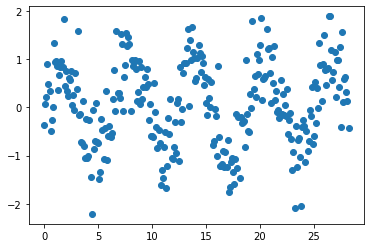

In [18]:
import random as rnd
import numpy as np
import math
dir(rnd)
x = np.arange(0,9*np.pi,0.1)
e=[rnd.normalvariate(0,0.5) for i in range(len(x))]
y=[math.sin(x[i])+e[i] for i in range(len(x))]

plt.scatter(x,y)

Dat=pd.DataFrame({"x":x,"y":y})
#display(Dat)
group=np.histogram(Dat['x'],bins='fd')
group

In [19]:
group=np.histogram(Dat['x'])
st_group = pd.DataFrame(columns = ["Внут.средняя",  "Внутригрупповая дисперсия","Вес группы", "Коэф.вар."])
data_group=[]
for i in range(len(group[0])):
    data_group.append(Dat[(group[1][i]<=Dat['x']) & (Dat['x']<=group[1][i + 1])]['y'])
    Avg_in = data_group[i].mean()
    D_in=data_group[i].std()**2
    Kv_in = math.sqrt(D_in)/Avg_in*100
    st_group = st_group.append(pd.Series([Avg_in, D_in, len(data_group[i]), Kv_in], index = st_group.columns),ignore_index=True)
display(st_group)

,Внут.средняя,Внутригрупповая дисперсия,Вес группы,Коэф.вар.
0,0.502426,0.262023,29.0,101.882055
1,-0.534379,0.562346,28.0,-140.330736
2,0.480258,0.612703,28.0,162.986248
3,-0.132210,0.519460,28.0,-545.144892
4,0.168510,0.892175,29.0,560.529239
5,-0.040977,0.732942,29.0,-2089.281980
6,-0.390436,0.787342,28.0,-227.264435
7,0.554085,0.340721,28.0,105.347135
8,-0.599208,0.384846,28.0,-103.529984
9,0.739927,0.362470,29.0,81.366779


In [20]:
Mean=Dat['y'].mean()
D_out=(((st_group['Внут.средняя']-Mean)**2)*st_group['Вес группы']).sum()/st_group['Вес группы'].sum()
D=Dat['x'].std()**2

cor_relation=math.sqrt(D_out/D)
print(cor_relation)

Dat.corr()

0.056247315599140875


,x,y
x,1.000000,0.023415
y,0.023415,1.000000


Ниже видно, что о неизменной направлении влияния между переменной x и y  говорить не приходится - в части интервала зависимость прямая, в другом обратная. Всевозможные коэффициенты линейной корреляции этого не чувствуют.

## Задание 1
Используя группировку по цене, выполнить расчет эмпирического корреляционного отношения для ram, speed, hd.

## Линейный коэффициент корреляции

--------------------------
И все же коэффициенты измеренния линейной статистической связи между различными факторами используются существенно чаще. Это связано с тем, что полученные статистические связи поддаются лучшей интерпретации и имеют большую практическую пользу при принятии различных управленческих решений.

Наибольшее распространение получили следующие меры измерения линейной статистической связи:

- **Коэффициент линейной корреляции Пирсона** характеризует тесноту и направление связи между двумя коррелируемыми признаками в случае наличия между ними линейной связи:
$$r_{\text{п}}=\frac{\frac{\sum_{i=1}^n(x_i-\overline{x})\cdot (y_i-\overline{y})}{n}}{\sigma_x\cdot\sigma_y}=\frac{\frac{\sum_{i=1}^n(x_iy_i-x_i\overline{y}-\overline{x}y_i+\overline{x}\overline{y})}{n}}{\sigma_x\cdot\sigma_y}=\frac{\frac{\sum x_iy_i}{n}+\overline{x}\cdot\overline{y}-\overline{y}\frac{\sum x_i}{n}-\overline{x}\frac{\sum y_i}{n}}{\sigma_x\cdot\sigma_y}=\frac{\overline{x\cdot y}+\overline{x}\cdot\overline{y}-2\overline{x}\cdot\overline{y}}{\sigma_x\cdot\sigma_y}$$
$$r_{\text{п}}=\frac{\overline{x\cdot y}-\overline{x}\cdot\overline{y}}{\sigma_x\cdot\sigma_y}$$

Коэффициент линейной корреляции меняется в диапазоне от-1 до 1.
Заметим, что линейные преобразования переменных не влияют на коэффициент корреляции - если все значения переменных увеличить или уменьшить на одну и ту же величину, ко величина коэффициента корреляции от этого не изменится.

Коэффициент корреляции не имеет размерности и, следовательно, его можно сопоставлять для разных выборок.

Проведем расчеты коэффициента корреляции Пирсона для двух статистически связанных переменных:

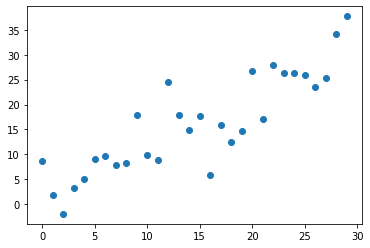

In [21]:
x=range(0,30)
y=[x[i]+rnd.normalvariate(0,5) for i in range(len(x))]
plt.scatter(x,y)

In [22]:
x=pd.Series(x)
y=pd.Series(y)
sigma_x=math.sqrt(((x-x.mean())**2).sum()/len(x))
sigma_y=math.sqrt(((y-y.mean())**2).sum()/len(y))
rp=((x*y).mean()-x.mean()*y.mean())/(sigma_x*sigma_y)
print(rp)

0.8680311526302819


Полученный коэффициент корреляции говорит о наличии прямой статистической связи между переменными x, y.

В библиотеке pandas и numpy для расчета коэффициента корреляции есть встроенные средства:

In [11]:
pd.DataFrame({'x':x,'y':y}).corr()

,x,y
x,1.000000,0.884817
y,0.884817,1.000000


In [12]:
np.corrcoef(x,y)

array([[1.        , 0.88481666],
       [0.88481666, 1.        ]])

В результате строится так называемая корреляционная матрица. Теснота корреляционной взаимосвязи между переменными x, y может быть качественно охарактеризована с помощью рекомендаций таблицы:

| Значение коэффициента корреляции | Теснота линейной связи                  |
|----------------------------------|-----------------------------------------|
| $0.8\leq \vert r_\text{п}\vert\leq 1$    | Сильная связь, близкая к функциональной |
| $0.5\leq \vert r_\text{п}\vert< 0.8$     | Связь средней силы                      |
| $0.3\leq |r_\text{п}|< 0.5 $    | Умеренная связь                         |
| $0.2\leq |r_\text{п}|< 0.3 $    | Слабая связь                            |
| $0\leq |r_\text{п}|<0.2  $      | Очень слабая связь                      |

Коэффициент корреляции очень чувствителен к выбросам. Даже отдельное аномальное наблюдение может существенно исказить значение коэффициента линейной корреляции Пирсона и привести к неправильным выводам.

На практике вместо использования представленной таблицы более тонкий анализ предполагает **проверку статистической значимости коэффициента корреляции**. 

Для проверки статистической значимости выдвигаются следующие гипотезы:

$H_0$ - отсутствие статистической взаимосвязи между признаками (полученные значения корреляции вызваны случайными факторами).

$H_1$ - конкурирующая гипотеза свидетельствует о наличии линейной взаимосвязи между признаками.

Для проверки гипотезы $H_0$ требуется исходя из выборочных данных подобрать статистику-критерий.
На практике используется статистика:

$$T=\frac{|r_{\text{п}}|}{\sqrt{1-r_{\text{п}}^2}}\cdot \sqrt{n-2}$$
n - число измерений.

При справедливости нулевой гипотезы статистика $T$ имеет распределение Стьюдента (t-распределение).

Таким образом, для проверки справедливости $H_0$ гипотезы по наблюдаемым данным рассчитывается статистика $T_{\text{набл}}$, затем по таблице распределения Стьюдента находится критическое значение статистики $T_\text{кр}$ для заданного уровня значимости $\alpha$ и степеней свободы $n-2$.

Если $T_{\text{набл}}>T_\text{кр}$, то нулевая гипотеза отвергается с вероятностью ошибки $\alpha$ и корреляция между переменными признается значимой, в противном случае нет.

В python для вычисления критического значения статистики можно использовать библиотеку scipy

In [37]:
from scipy.stats import t
alpha = 0.05  # significance level = 5% 
df = len(x)-2  # degrees of freedom                                        
                                           
Tкр = t.ppf(1 - alpha/2, 4) 
print(Tкр)

2.7764451051977987


In [139]:
Tнабл=rp/math.sqrt(1-rp**2)*math.sqrt(len(x)-2)
Tнабл

10.048539011208607

В нашем случае $T_{\text{набл}}>T_\text{кр}$ и нулевая гипотеза отвергается с вероятностью ошибиться 0.05.

В практике корреляционного анализа часто прибегают к различным наглядным способам представления корреляционных взаимосвязей. Популярным способом является визуализация корреляционной матрицы.

Для демонстрации возьмем популярный датасет - зависимость длины и ширины чашелистника и лепестка для различных видов ириса.

In [26]:

iris = ds.data('iris')
display(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


<img src="ris1.jpg">

In [27]:
#Возьмем только 4 первых столбца
MyData=pd.DataFrame({'sl':iris['Sepal.Length'],
                  'sw':iris['Sepal.Width'],
                  'pl':iris['Petal.Length'],
                  'pw':iris['Petal.Width']})

Для анализа корреляционных связей получим корреляционную матрицу и построим корреляционную карту:

In [28]:
corr = MyData.corr()
corr.style.background_gradient()

,sl,sw,pl,pw
sl,1.000000,-0.117570,0.871754,0.817941
sw,-0.117570,1.000000,-0.428440,-0.366126
pl,0.871754,-0.428440,1.000000,0.962865
pw,0.817941,-0.366126,0.962865,1.000000


Количество знаков в отображаемых коэффициентах корреляции, а также цветовую гамму можно регулировать можно регулировать:

In [29]:
corr.style.background_gradient(cmap='plasma').set_precision(2)

,sl,sw,pl,pw
sl,1.00,-0.12,0.87,0.82
sw,-0.12,1.00,-0.43,-0.37
pl,0.87,-0.43,1.00,0.96
pw,0.82,-0.37,0.96,1.00


Информацию о различных цветовых картах можно получить в описании библиотеки matplolib https://matplotlib.org/stable/tutorials/colors/colormaps.html

Вот некоторые из возможных значений:
'viridis', 'plasma', 'inferno', 'magma', 'cividis', 'ocean', 'coolwarm'

 0.968 | ['P3_6', 'P2_1', 'P4_7']## Множественный коэффициент корреляции

Для измерения тесноты связи при множественной корреляционной зависимости, то есть при исследовании трех и более признаков одновременно, вычисляется множественный и частные коэффициенты корреляции.

**Множественный коэффициент корреляции** характеризует степень линейной связи между одной переменной и массивом остальных переменных, он определяется следующим образом:
$$r_{\text{1/2,3,..,k}}=\sqrt{1-\frac{|C|}{A_{11}}}$$
$|C|$ - определитель корреляционной матрицы, $A_{11}$ - алгебраическое дополнение первого диагонального элемента корреляционной матрицы $C$, $k$ - размер корреляционной матрицы.

На практике часто используют квадрат множественного коэффициента корреляции, чтобы обосновать точность линейной модели предсказания значений одной переменной от остальных переменных. Квадрат множественного коэффициента корреляции называется **коэффициентом детерминации**, он характеризует долю дисперсии предсказываемой величины, обусловленную влиянием остальных переменных, включенных в модель.

Преведем расчет множественного коэффициента корреляции для нашего случая: 

In [30]:
r1_2_k=math.sqrt(1-np.linalg.det(corr)/np.linalg.det(np.array(corr)[1:,1:]))
print('Множественный коэффициент корреляции равен '+str(r1_2_k)+', коэффициент детерминации равен '+str(r1_2_k**2))

Множественный коэффициент корреляции равен 0.9266130368532032, коэффициент детерминации равен 0.8586117200663157


Значимость множественного коэффициента корреляции и детерминации проверяется с помощью F-критерия. 

Нулевая гипотеза $H_0$ формулируется относительно равенства множественного коэффициента корреляции нулю. Наблюдаемое значение статистики находится по формуле:

$$F_{\text{набл}}=\frac{\frac{1}{k-1}\cdot r_{\text{1/2,3,..,k}}^2}{\frac{1}{n-k}\cdot (1-r_{\text{1/2,3,..,k}}^2)}$$

Множественный коэффициент корреляции считается значимым с вероятностью ошибки $\alpha$, т.е. между $x_1$ и остальными факторами имеет место линейная статистическая зависимость, если $F_{\text{набл}}>F_{\text{кр}}(\alpha,k-1, n-k)$ (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html).

Выполним оценку статистической значимости множественного коэффициента корреляции для нашего случая:

In [33]:
Fn=1/(np.shape(corr)[0]-1)*(r1_2_k**2)/(1/(150-np.shape(corr)[0])*(1-r1_2_k**2))
from scipy.stats import f
Fkr=f.ppf(1-0.05, np.shape(corr)[0]-1, 150-np.shape(corr)[0])
print(Fn,Fkr)

295.5391380117191 2.6665742133041834


Таким образом, множественный коэффициент корреляции значимо отличается от нуля.

## Частный коэффициент корреляции

Также на практике используется частный коэффициент корреляции, который характеризует степень линейной зависимости между двумя переменными $x_1, x_2$ с исключение влияния (фиксированных значений) остальных переменных:

$$r_{\text{12/3,4,..,n}}=-\frac{A_{12}}{\sqrt{A_{11}{A_{22}}}}$$
$A_{ij}$- алгебраическое дополнение элемента $x_{ij}$ корреляционой матрицы $C$.

Выполним расчет частных коэффициентов корреляции с исключением влияния всех остальных факторов.

In [34]:
def matrix_minor(arr, i, j):
    return np.delete(np.delete(arr,i,axis=0), j, axis=1)
def r_partial(arr, i,j):
    aij=(-1)**(i+j)*np.linalg.det(matrix_minor(np.array(arr), i,j))
    aii=np.linalg.det(matrix_minor(np.array(arr), i,i))
    ajj=np.linalg.det(matrix_minor(np.array(arr), j,j))
    return -aij/math.sqrt(aii*ajj)
def corr_partial(arr):
    res=np.copy(arr)
    for i in range(np.shape(arr)[0]):
        for j in range(np.shape(arr)[0]):
            if i!=j:
                res[i,j]=r_partial(arr, i,j)
            else:
                res[i,j]=-r_partial(arr, i,j)
    res=pd.DataFrame(res)
    res.index=arr.index;res.columns=arr.columns
    return res

In [35]:
display(pd.DataFrame(corr_partial(corr)).style.background_gradient(cmap='plasma').set_precision(2))
display(corr.style.background_gradient(cmap='plasma').set_precision(2))


,sl,sw,pl,pw
sl,1.00,0.63,0.72,-0.34
sw,0.63,1.00,-0.62,0.35
pl,0.72,-0.62,1.00,0.87
pw,-0.34,0.35,0.87,1.00


,sl,sw,pl,pw
sl,1.00,-0.12,0.87,0.82
sw,-0.12,1.00,-0.43,-0.37
pl,0.87,-0.43,1.00,0.96
pw,0.82,-0.37,0.96,1.00


Статистическая значимость частного коэффициента корреляции при фиксировании всех факторов, кроме двух, определяется по статистике аналогичной формуле для коэффициента линейной корреляции Пирсона, однако количество степеней свободы уменьшается до $n-l-2$, где $l=k-2$ - число фиксированных факторов (в нашем случае это число равно количеству показателей, минус 2):
$$T_{\text{набл}}=\frac{|r_{\text{12/3,4..k}}|}{\sqrt{1-r_{\text{12/3,4..k}}^2}}\cdot \sqrt{n-l-2}$$

Для проверки справедливости $H_0$ гипотезы в таблице распределения Стьюдента находится критическое значение статистики $T_\text{кр}$ для заданного уровня значимости $\alpha$ и степеней свободы $n-l-2$.

Выполним расчеты значимых коэффицентов корреляции корреляционной матрицы и для матрицы частных коэффициентов корреляции, заполнив не значащие значения нулями:

In [38]:
def corr_p_s(arr,n,alpha):
    res=np.array(corr_partial(arr))
    for i in range(np.shape(arr)[0]):
        for j in range(np.shape(arr)[0]):
            if i!=j:
                tn=math.fabs(res[i,j])*math.sqrt(n-(np.shape(arr)[0]-2)-2)/math.sqrt(1-res[i,j]**2)
                tk=t.ppf(1 - alpha, n-(np.shape(arr)[0]-2)-2)
                if tn<tk:
                    res[i,j]=0
    res=pd.DataFrame(res)
    res.index=arr.index;res.columns=arr.columns
    return res

def corr_s(arr,n,alpha):
    res=np.array(arr)
    for i in range(np.shape(arr)[0]):
        for j in range(np.shape(arr)[0]):
            if i!=j:
                tn=math.fabs(res[i,j])*math.sqrt(n-2)/math.sqrt(1-res[i,j]**2)
                tk=t.ppf(1 - alpha, n-2)
                if tn<tk:
                    res[i,j]=0
    res=pd.DataFrame(res)
    res.index=arr.index;res.columns=arr.columns
    return res

In [39]:
display(corr_p_s(corr,150, 0.05).style.background_gradient(cmap='plasma').set_precision(2))
display(corr_s(corr,150, 0.05).style.background_gradient(cmap='plasma').set_precision(2))

,sl,sw,pl,pw
sl,1.00,0.63,0.72,-0.34
sw,0.63,1.00,-0.62,0.35
pl,0.72,-0.62,1.00,0.87
pw,-0.34,0.35,0.87,1.00


,sl,sw,pl,pw
sl,1.00,0.00,0.87,0.82
sw,0.00,1.00,-0.43,-0.37
pl,0.87,-0.43,1.00,0.96
pw,0.82,-0.37,0.96,1.00


Если в результате анализа выявлена сильная корреляционная связь между переменными, то прежде чем делать выводы о взаимосвязи, необходимо постараться интерпретировать связь. Возможно, что мы попали в ситуацию ложной корреляции. Например, если наблюдать за появлением машины скорой помощи во дворе и тяжелым заболеванием какого-нибудь жителя двора, то это не значит, что появление машины скорой помощи вызывает тяжелые заболевания.

## Ранговые коэффициенты корреляции

Не всегда для оценки корреляции можно использовать коэффициент линейной корреляции Пирсона. Так может быть ситуация, когда один или оба признака не являются количественными и представлены в номинальных шкалах. Также наиболее корректное использование линейного коэффициента корреляции Пирсона связано с требованием нормального распределения исследуемых признаков, что также может быть выполнено далего не всегда.

Во всех таких случаях используют так называемые **ранговые коэффициенты корреляции**. Для их определения абстрагируются от количественных значений переменных и обращают внимания лишь на их взаимный порядок друг относительно друга - проводят ранжирование (сортировку).

**Ранжирование** – это процедура упорядочения изучаемых объектов, которая выполняется на основе рассматриваемого признака . **Ранг** – это порядковый номер значений признака, расположенных в порядке возрастания или убывания их величин. Если значения признака имеют одинаковую количественную оценку, то ранг всех этих значений принимается равным средней арифметической из соответствующих номеров мест, которые они определяют.
Данные ранги называются **связными**.

Среди непараметрических методов оценки тесноты связи наибольшее значение имеют **ранговые коэффициенты Спирмена** и **Кендалла**. Эти коэффициенты могут быть использованы для определения тесноты связи как между количественными, так и между качественными признаками (рейтинги, уровни образования, квалификации и т.п.).

### Ранговый коэффициент корреляции Спирмена

Данный коэффициент определяется по формуле:
    $$\rho_{xy}=1-\frac{6\cdot \sum_{i=1}^n d_i^2}{n(n^2-1)}$$
где $n$ - количество измерений, $d_i$ - разность рангов между переменными $x, y$.

Данная формула используется в случае отсутствия связанных рангов в обоих признаках. В противном случае в формулу нужно вводить поправочные коэффициенты.

При наличии связанных рангов по каждому признаку рассчитывают величину:
    $$T_x=\frac{1}{2}\cdot \sum_{t=1}^{m_x}((N^x_t)^3-N^x_t)$$
     $$T_y=\frac{1}{2}\cdot \sum_{t=1}^{m_y}((N^y_t)^3-N^y_t)$$
     
$m_x$ - число групп неразличимых рангов по переменной $x$, $m_y$ - число групп неразличимых рангов по переменной $y$, $N^x_t$ - число рангов, входящих в $t$-ю группу неразличимых рангов по переменной $x$, $N^y_t$ - число рангов, входящих в $t$-ю группу неразличимых рангов по переменной $y$

В этом случае ранговый коэффициент Спирмена определяется по формуле:
    $$\rho_{xy}=\frac{\frac{1}{6}(n^3-n)-\sum_{i=1}^{n}(x_i-y_i)^2-T_x-T_y}{\sqrt{\left(\frac{1}{6}(n^3-n)-2T_x\right)\cdot \left(\frac{1}{6}(n^3-n)-2T_y\right)}}$$

Для проверки значимости коэффициента корреляции Спирмена выдвигают гипотезу $H_0$, что $rho_{xy}=0$, после чего находят критическое значение статистики:
$$T_{\text{кр}}=t(\alpha,n-2)\cdot \sqrt{\frac{1-\rho_{xy}^2}{n-2}}$$

Если $|\rho|<T_{\text{кр}}$, то нулевая гипотеза не отвергается. В противном случае нулевая гипотеза отвергается с вероятностью ошибки $\alpha$.

### Ранговый коэффициент корреляции Кендалла

Этот кеоэффициент используется для измерения связи между качественными и количественными переменными, характеризующими однородные объекты и ранжированные по одному принципу. Данный коэффициент рассчитывается по формуле:
$$\tau=\frac{2S}{n(n-1)}$$

где $S=P-Q$

Расчет данного коэффициента выполняется в следующей последовательности:
1. Значения X ранжируются в порядке возрастания или убывания;
2. Значения Y располагаются в порядке, соответствующем значениям X ;
3. Для каждого ранга Y определяется число следующих за ним значений рангов, превышающих его величину. Суммируя таким образом числа, определяется величина P , как мера соответствия последовательностей рангов по X и Y и учитывается со знаком (+);
4. Для каждого ранга Y определяется число следующих за ним значений рангов, меньших его величины. Суммарная величина обозначается через Q и фиксируется со знаком (–);
5. Определяется сумма баллов по всем членам ряда.

Например,имеем сделующую таблицу рангов:
    
| x | 1 | 2 | 3 | 4 | 5 | 6 | 7 |
|---|---|---|---|---|---|---|---|
| y | 7 | 6 | 4 | 5 | 3 | 2 | 1 |
    

Рассчитываем $P=0+0+1+0+0+0+0=1$

Рассчитываем $Q=6+5+3+3+2+1=20$

Определяем $S=P-Q=1-20=-19$

Рассчитываем коэффициент ранговой корреляции:
$$\tau=\frac{2\cdot(-19)}{7(7-1)}=-0.905$$

В Python для использования рассмотренных коэффициентов ранговой корреляции достаточно в методе corr датафрейма указать параметр method={"pearson","spearman","kendall"}, по умолчанию используется "pearson". 

In [151]:
corr = MyData.corr("spearman")
corr.style.background_gradient()

,sl,sw,pl,pw
sl,1.000000,-0.166778,0.881898,0.834289
sw,-0.166778,1.000000,-0.309635,-0.289032
pl,0.881898,-0.309635,1.000000,0.937667
pw,0.834289,-0.289032,0.937667,1.000000


In [152]:
corr = MyData.corr("kendall")
corr.style.background_gradient()

,sl,sw,pl,pw
sl,1.000000,-0.076997,0.718516,0.655309
sw,-0.076997,1.000000,-0.185994,-0.157126
pl,0.718516,-0.185994,1.000000,0.806891
pw,0.655309,-0.157126,0.806891,1.000000


In [153]:
corr = MyData.corr("pearson")
corr.style.background_gradient()

,sl,sw,pl,pw
sl,1.000000,-0.117570,0.871754,0.817941
sw,-0.117570,1.000000,-0.428440,-0.366126
pl,0.871754,-0.428440,1.000000,0.962865
pw,0.817941,-0.366126,0.962865,1.000000


Одним из недостатков данных коэффициентов является отсутствие возможности расчета частных коэффициентов корреляции.

Как правило, коэффициент Кендалла меньше коэффициента Спирмена. При достаточно большом объеме совокупности значения данных коэффициентов имеют следующую зависимость:
$$\tau=\frac{2}{3}\rho_{xy}$$

## Анализ качественных признаков

В случае качественных признаков нам, как правило, недоступна числовая информация. Необходимо проводить оценки по ряду специальных показателей. 

### Коэффициенты ассоциации и контингенции

Данные коэффициенты используются, если каждый из качественных признаков состоит из двух возможных значений. Например, требуется выяснить есть ли связь между количеством бракованных и годных изделий в зависимости от полового признака работника. 

Для вычисления таких коэффициентов вначале строится таблица следующего вида:

|       |Брак| Годен|
|-------|----|------|
|Мужчина|  a |   b  |
|Женщина|  c |   d  |

В таблице использованы следующие обозначения: 

$a$ - количество бракованных изделий от мужчин;
$b$ - количество годных изделий от мужчин;
$c$ - количество бракованных изделий от женщин;
$d$ - количество годных изделий от женщин.


**Коэффициент ассоциации Юла**:
$$k_a=\frac{ad-bc}{ad+bc}$$

**Коэффициент контингенции Пирсона**:
$$k_k=\frac{ad-bc}{\sqrt{(a+b)(b+d)(a+c)(c+d)}}$$

Данные коэффициенты меняются от -1 до 1 и имеют интерпретацию, аналогичную коэффициенту линейной корреляции Пирсона. Однако, коэффициент контингенции всегда меньше коэффициента ассоциации. Связь признается подтвержденной, если $k_a\geq 0.5$ или $k_k\geq 0.5$.

-0.19786287044394643### Коэффициенты взаимной сопряженности

Когда  множество качественных значений превышает два, для определения тесноты связей применяют **коэффициенты взаимной сопряженности Пирсона и Чупрова**.

Для их расчета используется таблица со сгруппированной статистической информацией следующего вида (предполагается, что первый признак принимает возможные качественные значения $A_1, A_2, \ldots A_k$, а второй - возможные качественные значения $B_1, B_2, \ldots, B_m$):


|Признак|$A_1$|$A_2$|$A_3$|$\ldots$|$A_k$|Итого|
|-------|-----|-----|-----|--------|-----|-----|
|$B_1$  |$f_{11}$|$f_{12}$|$f_{13}$|$\ldots$|$f_{1k}$|$k_1$|
|$B_2$  |$f_{21}$|$f_{22}$|$f_{23}$|$\ldots$|$f_{2k}$|$k_2$|
|$B_3$  |$f_{31}$|$f_{32}$|$f_{33}$|$\ldots$|$f_{3k}$|$k_3$|
|$\ldots$  |$\ldots$|$\ldots$|$\ldots$|$\ldots$|$\ldots$|$\ldots$|
|$B_m$  |$f_{m1}$|$f_{m2}$|$f_{m3}$|$\ldots$|$f_{mk}$|$k_m$|
|Итого|$m_1$|$m_2$|$m_3$|$\ldots$|$m_k$|

В данной таблице $f_{ij}$ - количество случаев, для которых первый признак принимал значение $A_j$, второй признак значение $B_i$, $k_i=\sum_{j=1}^{k}f_{ij}, m_j=\sum_{i=1}^{m}f_{ij}$

**Коэффициент взаимной сопряженности Пирсона** рассчитывается по формуле:
    $$K_p=\sqrt{\frac{\varphi^2}{1+\varphi^2}}$$
    
Здесь $\varphi^2$ - показатель средней квадратической сопряженности, он определяется как сумма отношений квадратов частот каждой клетки таблицы к произведению итоговых частот соответствующего столбца и строки:
$$\varphi^2=\left(\sum_{i=1}^{m}\sum_{j=1}^{k}\frac{f_{ij}^2}{k_i\cdot m_j}\right)-1$$

**Коэффициент взаимной сопряженности Чупрова** также требует расчета $\varphi^2$ и определяется следующим образом:
$$K_h=\sqrt{\frac{\varphi^2}{(k-1)(m-1)}}$$

где $k$ - количество групп различных значений первого признака, $m$ - количество групп различных значений второго признака.

Коэффициент взаимоной сопряженности Чупрова является более гибким, так как учитывает число образуемых по каждому признаку групп. Его использование является более предпочтительным.

## Коэффициент конкордации

Данный коэффициент используется для оценки степени тесноты связи не только между двумя факторами, но и любым другим их количеством. Он позволяет оценить насколько согласована и однонаправлена группа показателей. Например, на группе экспертов получены разные мнения и требуется оценить, насколько они в целом согласованы.


Сущность подхода заключается в следующем. Пусть имеется $n$ объектов, оцененных по $m$ показателям, и пусть $r_{ij}$ - это ранг $i$-го объекта по $j$-му показателю.

Введем суммарный ранг для каждого объекта:
$$r_i=\sum_{j=1}^{m}r_{ij}, i=1, 2, \ldots, n$$
Будем рассматривать величины $r_i$ как реализацию некоторой случайной величины и найдем оценку ее дисперсии:
$$D=\frac{1}{n-1}\sum_{i=1}^{n}(r_i-\overline{r})^2$$
где $\overline{r}=\frac{\sum_{i=1}^{n}r_i}{n}$ - оценка математического ожидания.

Коэффициент конкордации определяется как отношение оценки дисперсии к максимальному значению этой оценки:
$$W=\frac{D}{D_{max}}$$

При вычислении коэффициента конкордации выделяют два случая:

- Отсутствие связанных рангов. 

В этом случае максимальная дисперсия будет наблюдаться при полном согласии показателей, которая характеризуется матрицей рангов следующего вида:
$$R=\begin{pmatrix}
1 & 1 & 1& \ldots & 1\\
2 & 2 & 2& \ldots & 2\\
\ldots & \ldots & \ldots & \ldots & \ldots\\
n & n & n& \ldots & n\\
\end{pmatrix}$$

Для данной матрицы дисперсия может быть вычислена с учетом того, что $r_i=\sum_{j=1}^{m}r_{ij}=im$:
    $$D_{max}=\frac{1}{n-1}\sum_{i=1}^{n}(r_i-\overline{r})^2=\frac{1}{n-1}\sum_{i=1}^{n}(r_i^2-2 r_i\overline{r}+\overline{r}^2)=\frac{1}{n-1}\left(\sum_{i=1}^{n}r_i^2-2\overline{r}\sum_{i=1}^{n}r_i+n\overline{r}^2\right)$$

$$-2\overline{r}\sum_{i=1}^{n}r_i+n\overline{r}^2=-2\frac{\left(\sum_{i=1}^{n}r_i\right)^2}{n}+\frac{\left(\sum_{i=1}^{n}r_i\right)^2}{n}=-n\overline{r}^2$$

 $$D_{max}=\frac{1}{n-1}\left(\sum_{i=1}^{n}r_i^2-n\overline{r}^2\right)=\frac{1}{n-1}\left(\sum_{i=1}^{n}(im)^2-n\left(\sum_{i=1}^{n}\frac{im}{n}\right)^2\right)=\frac{1}{n-1}\left(\frac{m^2n(n+1)(2n+1)}{6}-\frac{nm^2(n+1)^2}{4}\right)=\frac{m^2n(n+1)}{12}$$

Тогда окончательно получаем:
    $$W=\frac{12\sum_{i=1}^{n}(r_i-\overline{r})^2}{m^2(n^3-n)}$$

Коэффициент конкордации изменяется от 0 до 1. В случае полного совпадения ранжировок $W = 1$, в случае полного расхождения $W = 0$.

- Наличие связанных рангов.

Если в ранжировках имеются связанные ранги, то максимальное значение дисперсии в знаменателе формулы  становится меньше, чем при отсутствии связанных рангов. В этом случае коэффициент конкордации вычисляется по формуле:
$$W=\frac{12\sum_{i=1}^{n}(r_i-\overline{r})^2}{m^2(n^3-n)-m\sum_{j=1}^m T_j}$$

где $$T_j=\sum_{k=1}^{H_j}(h_k^3-h_k)$$
$T_j$ - показатель связанных рангов в $j$-й ранжировке, $H_j$ - число групп равных рангов в $j$-й ранжировке, $h_k$ - число равных рангов в $k$-й группе связанных рангов при ранжировке по $j$-му показателю.

## Нормирование показателей, преобразование шкал

В ряде задач анализа данных требуется преобразовать значения показателей к единой безразмерной соизмеримой шкале. 
Для этих целей используются различные методы нормирования. 

Одним из наиболее популярных является так называемая **стандартизация данных**. 

Пусть имеются данные $x_1, x_2, \ldots, x_n$, тогда стандартизированными являются данные вида:
$$x^*_i=\frac{x_i-\overline{x}}{\sigma}$$
где $\overline{x}$ - средняя арифметическая, $\sigma$ - среднее квадратическое отклонение данных $x_1, x_2, \ldots, x_n$.

Покажем, что средняя арифметическая нормированных данных равна нулю:
   $$\overline{x^*}=\frac{\sum_{i=1}^{n}x^*_i}{n}=\frac{\sum_{i=1}^{n}\frac{x_i-\overline{x}}{\sigma}}{n}=\frac{1}{n\sigma}\left(\sum_{i=1}^{n}x_i-\sum_{i=1}^{n}\overline{x}\right)=\frac{1}{n\sigma}(n\overline{x}-n\overline{x})=0$$

Также покажем, что дисперсия стандартизированных данных равна единице:
     $$\frac{1}{n}\sum_{i=1}^{n}(x^*_i-\overline{x^*})^2=\frac{1}{n}\sum_{i=1}^{n}\left(\frac{x_i-\overline{x}}{\sigma}\right)^2=\frac{1}{\sigma^2}\cdot \frac{\sum_{i=1}^{n}(x_i-\overline{x})^2}{n}=\frac{\sigma^2}{\sigma^2}=1$$

Процедура стандартизации является обязательным этапом во многих многомерных методах статистического анализа: факторный, компонентный, кластерный анализ.

Кроме рассмотренного способа, одним из методов нормирования можно считать и переход от значений к их рангам.

На практике также могут встречаться случаи разнонаправленного влияния переменных, которые требуется привести к шкале $[0,N]$
1. Чем больше значение переменной, тем лучше:
$$x^*_i=\frac{x_i-x_{min}}{x_{max}-x_{min}}\cdot N$$
2. Чем меньше значение переменной, тем лучше:
$$x^*_i=\frac{x_{max}-x_i}{x_{max}-x_{min}}\cdot N$$
3. Чем ближе к $x_{\text{опт}}$, тем лучше:
$$x^*_i=\left(1-\frac{|x_i-x_{\text{опт}}|}{max\{(x_{max}-x_{\text{опт}}), (x_{\text{опт}}-x_{min})\}}\right)\cdot N$$